* 데이터 수집       
http://data.seoul.go.kr/dataList/OA-1170/S/1/datasetView.do

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

# 데이터 수집

## 데이터프레임 생성
* csv 파일을 데이터프레임으로 만들기
* encoding='cp949'

In [26]:
df = pd.read_csv('../data/생필품 농수축산물 가격 정보(2021년1월_6월).csv',
                 encoding='cp949')

In [27]:
df.head(3)

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,통인시장,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24


## 결측치 확인

In [28]:
df.isnull().sum()

일련번호                   0
시장/마트 번호               0
시장/마트 이름               0
품목 번호                  0
품목 이름                  0
실판매규격                  0
가격(원)                  0
년도-월                   0
비고                   274
시장유형 구분(시장/마트) 코드      0
시장유형 구분(시장/마트) 이름      0
자치구 코드                 0
자치구 이름                 0
점검일자                   0
dtype: int64

## 자료형 확인

In [29]:
df.dtypes

일련번호                  int64
시장/마트 번호              int64
시장/마트 이름             object
품목 번호                 int64
품목 이름                object
실판매규격                object
가격(원)                 int64
년도-월                 object
비고                   object
시장유형 구분(시장/마트) 코드     int64
시장유형 구분(시장/마트) 이름    object
자치구 코드                int64
자치구 이름               object
점검일자                 object
dtype: object

# 데이터 확인

## 컬럼별 데이터 확인

In [30]:
df.head(1)

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24


## 시장/마트 목록

In [31]:
# 시장/마트 목록
df["시장/마트 번호"].nunique()

102

In [32]:
df["시장/마트 번호"].unique()

array([  2, 228,   1,  25,   6,  10,  51, 207,  32, 109,  22,  16,  56,
        42,  86,  38,  20,  40,  62,  85,  82,  98,  88,  21,  90,  84,
        63,  80,  68,  78,  66, 100,  72,  31, 133, 102, 103,  74, 200,
       120, 145, 218, 130, 127, 121,  27,  96,  94,  60,  75,  28,  44,
       108,  53,  73,  45, 212,  33, 223, 129, 219, 115,  55,  19,  11,
       140, 114, 210, 224, 110,  26, 147, 214, 148,  49, 116, 151,  92,
       221, 205, 123, 216, 134,  13, 215, 135, 136, 213,   8, 146,  14,
       220,  15, 153, 154, 199, 222,  91, 206, 227, 225, 226], dtype=int64)

In [33]:
# 시장/마트 목록
df["시장/마트 이름"].nunique()

102

In [34]:
df["시장/마트 이름"].unique()

array(['신세계백화점', '방배종합시장', '통인시장', '방학동도깨비시장', '이마트 용산점', '용문시장',
       'NC백화점 불광점', '관악신사시장(신림4동)', '영천시장', '고척근린시장', '이마트 여의도점',
       '현대백화점 미아점', '롯데백화점', '이마트 가양점', '홈플러스 동대문점', '송화시장', '영등포전통시장',
       '홈플러스 등촌점', '후암시장', '경동시장', '롯데마트 강변점', '롯데백화점 노원점', '롯데백화점 청량리점',
       '홈플러스 영등포점', '우림시장', '청량리종합시장', '농협 하나로마트 용산점', '이마트 자양점',
       '롯데백화점 미아점', '자양골목시장', '수유재래시장', '홈플러스 중계점', '금남시장', '인왕시장',
       '원당종합시장', '목3동시장', '신영시장', '이마트 왕십리점', '뉴코아아울렛 강남점', '망원시장',
       '마천중앙시장', '신세계백화점 강남점', '롯데백화점 영등포점', '남성시장', '마포농수산물시장',
       '이마트 창동점', '공릉동 도깨비시장', '홈플러스 면목점', '이마트 청계점', '이마트 성수점',
       '홈플러스 방학점', '이마트 역삼점', '남구로시장', '이마트 은평점', '뚝도시장', '롯데백화점 강남점',
       '노룬산골목시장', '현대백화점 신촌점', '홈플러스 목동점', '태평백화점', '대조시장', '남문시장',
       '광장시장', '대림중앙시장', '남대문시장', '하나로클럽 양재점', '현대시장', '상계중앙시장',
       '농협하나로마트 신촌점', '이마트 신도림점', '신창시장', '롯데백화점 잠실점', '이마트 목동점',
       '홈플러스 잠실점', '대림시장', '홈플러스 시흥점', '암사종합시장', '이마트 상봉점', '숭인시장',
       '둔촌역전통시장', '홈플러스 월드컵점', '도곡시장', '신원시장(신림1동)',

In [35]:
df_market = df[["시장/마트 번호","시장/마트 이름","자치구 이름",
                "시장유형 구분(시장/마트) 이름"
    ]].drop_duplicates()
#중복제거

In [36]:
# 자치구 별 시장/마트 갯수
df_market['자치구 이름'].value_counts()

자치구 이름
중구      6
도봉구     5
관악구     5
구로구     5
영등포구    5
노원구     4
금천구     4
강남구     4
송파구     4
마포구     4
양천구     4
성동구     4
강북구     4
중랑구     4
동대문구    4
광진구     4
서초구     4
강서구     4
성북구     4
서대문구    4
은평구     4
용산구     4
강동구     4
동작구     2
종로구     2
Name: count, dtype: int64

In [37]:
# 자치구 이름으로 시장/마트 확인
df_market[df_market['자치구 이름']=="중구"]

,시장/마트 번호,시장/마트 이름,자치구 이름,시장유형 구분(시장/마트) 이름
0,2,신세계백화점,중구,대형마트
21,56,롯데백화점,중구,대형마트
257,60,이마트 청계점,중구,대형마트
576,11,남대문시장,중구,전통시장
3799,8,롯데마트 서울역점,중구,대형마트
4920,199,서울중앙시장,중구,전통시장


## 품목 목록

In [38]:
# 품목 목록
df_items = df[["품목 번호","품목 이름"]].drop_duplicates()
df_items

,품목 번호,품목 이름
0,133,무(세척무)
1,23,상추
2,266,"고등어(생물,국산)"
3,268,"고등어(냉동,국산)"
4,171,달걀(10개)
...,...,...
5348,135,"조기(중국산,생물)"
6813,257,"오징어(냉동,수입산)"
15781,316,"고등어(30cm,국산)"
18573,134,달걀(왕란)


In [39]:
# 품목 이름 (10개씩 확인)
for i in range(0,len(df_items),10):
    print(i)
    print(df_items[i:i+10])

0
   품목 번호        품목 이름
0    133       무(세척무)
1     23           상추
2    266   고등어(생물,국산)
3    268   고등어(냉동,국산)
4    171      달걀(10개)
5     22           오이
6    312          애호박
7     24           양파
8     58  쇠고기(한우,불고기)
9    307  배추(2.5~3kg)
10
    품목 번호         품목 이름
10    309    양파(1.5kg망)
11    320       달걀(30개)
12    305  사과(부사, 300g)
14    306   배(신고, 600g)
15     26            배추
16    283       닭고기(육계)
18    119     호박(인큐베이터)
19    303            조기
21    311       오이(다다기)
22    202    돼지고기(생삼겹살)
20
    품목 번호       품목 이름
23    302          명태
30    136   조기(국산,생물)
31    253         오징어
32    152  명태(러시아,냉동)
33    282      무(세척무)
34     99  돼지고기(생삼겹살)
35    310    상추(100g)
36    254  오징어(생물,국산)
45     18         닭고기
53    285        돼지고기
30
     품목 번호       품목 이름
54     264  명태(냉동,수입산)
56     276       배(신고)
58      28          사과
79      25           무
97     278         쇠고기
103    308      무(1kg)
114    259   조기(냉동,국산)
135    304         고등어
157     27           배
177    260 

In [40]:
df_items=df_items.sort_values("품목 이름")
#데이터 프레임으로 정렬할 경우에는 정렬 기준이 될 컬럼을 입력

In [41]:
for i in range(0,len(df_items),10):
    print(i)
    print(df_items[i:i+10])

0
       품목 번호           품목 이름
222       13             고등어
135      304             고등어
15781    316    고등어(30cm,국산)
1550     318   고등어(30cm,수입산)
3        268      고등어(냉동,국산)
4834     269     고등어(냉동,수입산)
2        266      고등어(생물,국산)
1341     267     고등어(생물,수입산)
3984     314  냉동참조기(20cm,국산)
3706     313  냉동참조기(20cm,수입)
10
       품목 번호     품목 이름
768       17        달걀
4        171   달걀(10개)
860      321   달걀(15개)
11       320   달걀(30개)
18573    134    달걀(왕란)
5280     181    달걀(왕란)
45        18       닭고기
16       283   닭고기(육계)
583      275   닭고기(중간)
487      138  닭고기(토종닭)
20
       품목 번호         품목 이름
226      288            동태
53       285          돼지고기
1501      52     돼지고기(삼겹살)
34        99    돼지고기(생삼겹살)
22       202    돼지고기(생삼겹살)
23       302            명태
555      315  명태(45cm,수입산)
19167    263     명태(냉동,국산)
54       264    명태(냉동,수입산)
32       152    명태(러시아,냉동)
30
      품목 번호        품목 이름
2457    265   명태(생물,수입산)
1019    184   명태(일본산,냉동)
79       25            무
103     308       무(

## 자치구 목록

In [42]:
df_gu = df[["자치구 코드","자치구 이름"]].drop_duplicates()

In [43]:
df_gu

,자치구 코드,자치구 이름
0,140000,중구
1,650000,서초구
2,110000,종로구
3,320000,도봉구
4,170000,용산구
7,380000,은평구
9,620000,관악구
13,410000,서대문구
15,530000,구로구
17,560000,영등포구


In [44]:
df_gu.shape

(25, 2)

## 시장 유형

In [45]:
df

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,통인시장,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24
3,1671116,25,방학동도깨비시장,268,"고등어(냉동,국산)",350g,2500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
4,1667066,6,이마트 용산점,171,달걀(10개),15구,5980,2021-06,낭이생생대란,2,대형마트,170000,용산구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42694,1636118,226,롯데마트 구로점,171,달걀(10개),10개(600g),2990,2021-01,"국내산,특란",2,대형마트,530000,구로구,2021-01-21
42695,1636108,226,롯데마트 구로점,27,배,1개 (600g),1590,2021-01,"국내산,신고",2,대형마트,530000,구로구,2021-01-21
42696,1636114,226,롯데마트 구로점,312,애호박,1개 (300g),2790,2021-01,"국내산,청원",2,대형마트,530000,구로구,2021-01-21
42697,1636113,226,롯데마트 구로점,22,오이,1개 (200g),1190,2021-01,"국내산,백오이",2,대형마트,530000,구로구,2021-01-21


In [46]:
df_gubun = df[["시장유형 구분(시장/마트) 코드"]].drop_duplicates()


In [47]:
df_gubun

,시장유형 구분(시장/마트) 코드
0,2
1,1


# 삼겹살 가격 분석

## 삼겹살 데이터
* 특정 문자열이 포함되어있는지 확인 : .str.contains(문자열)

In [48]:
# 2021-06 데이터 이용
df

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,통인시장,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24
3,1671116,25,방학동도깨비시장,268,"고등어(냉동,국산)",350g,2500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
4,1667066,6,이마트 용산점,171,달걀(10개),15구,5980,2021-06,낭이생생대란,2,대형마트,170000,용산구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42694,1636118,226,롯데마트 구로점,171,달걀(10개),10개(600g),2990,2021-01,"국내산,특란",2,대형마트,530000,구로구,2021-01-21
42695,1636108,226,롯데마트 구로점,27,배,1개 (600g),1590,2021-01,"국내산,신고",2,대형마트,530000,구로구,2021-01-21
42696,1636114,226,롯데마트 구로점,312,애호박,1개 (300g),2790,2021-01,"국내산,청원",2,대형마트,530000,구로구,2021-01-21
42697,1636113,226,롯데마트 구로점,22,오이,1개 (200g),1190,2021-01,"국내산,백오이",2,대형마트,530000,구로구,2021-01-21


In [49]:
# 2021-06 데이터 이용 // 삽결살 // 한 근(600g)
df_sam = df[(df["품목 이름"].str.contains("삼겹살"))&(df["년도-월"]=="2021-06")
   &(df["실판매규격"].str.contains("600g"))]
df_sam

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
22,1668431,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,선진포크,2,대형마트,290000,성북구,2021-06-24
47,1670116,98,롯데백화점 노원점,99,돼지고기(생삼겹살),600g,26940,2021-06,한돈,2,대형마트,350000,노원구,2021-06-24
76,1674090,42,이마트 가양점,99,돼지고기(생삼겹살),600g,15480,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
86,1668834,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
146,1667684,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6439,1668261,100,홈플러스 중계점,99,돼지고기(생삼겹살),600g,22140,2021-06,한돈,2,대형마트,350000,노원구,2021-06-24
6514,1674124,40,홈플러스 등촌점,99,돼지고기(생삼겹살),600g,14940,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
6700,1671992,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,도드람,2,대형마트,290000,성북구,2021-06-24
6721,1670048,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,선진포크,2,대형마트,290000,성북구,2021-06-24


In [50]:
# 삼겹살 600g의 평균 가격은?
df_sam["가격(원)"].mean()

16842.723214285714

In [51]:
# 삼겹살 600g의 최고 가격은?
df_sam["가격(원)"].max()

35890

In [52]:
# 삼겹살 600g의 최저 가격은?
df_sam["가격(원)"].min()

1690

In [53]:
df_sam[df_sam["가격(원)"]<=5000]


,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
3645,1667404,27,이마트 창동점,99,돼지고기(생삼겹살),600g,2720,2021-06,국내산,2,대형마트,320000,도봉구,2021-06-24
4052,1667438,28,홈플러스 방학점,99,돼지고기(생삼겹살),600g,1690,2021-06,국내산,2,대형마트,320000,도봉구,2021-06-24


## 우리동네 삼겹살 가격

In [72]:
gu = input("구이름:")
print(f"구이름:{gu}")

구이름:광진구


In [79]:
# 우리구 삼겹살 가격
df_sam_gu = df_sam[df_sam["자치구 이름"]==gu][[
    "시장/마트 이름","품목 이름","실판매규격","가격(원)"]].drop_duplicates().sort_values("가격(원)",ascending=False)
df_sam_gu

,시장/마트 이름,품목 이름,실판매규격,가격(원)
745,이마트 자양점,돼지고기(생삼겹살),600g,22080
3943,이마트 자양점,돼지고기(생삼겹살),600g,21480
4191,롯데마트 강변점,돼지고기(생삼겹살),600g,20880
793,롯데마트 강변점,돼지고기(생삼겹살),600g,20280
265,자양골목시장,돼지고기(생삼겹살),600g,18000
4027,노룬산골목시장,돼지고기(생삼겹살),600g,16900
4131,롯데마트 강변점,돼지고기(생삼겹살),600g,16080
615,롯데마트 강변점,돼지고기(생삼겹살),600g,15480
459,이마트 자양점,돼지고기(생삼겹살),600g,14880


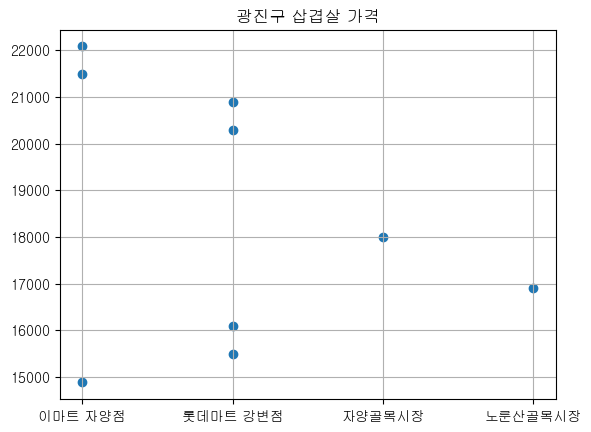

In [80]:
# 시각화
x = df_sam_gu["시장/마트 이름"]
y = df_sam_gu["가격(원)"]

plt.scatter(x,y)
plt.title(gu+" 삽겹살 가격")
plt.grid(True)
plt.show()

## 마트 지점별 삼겹살 가격

In [81]:
mart = input("시장/마트이름:")
print(f"시장/마트이름:{mart}")

시장/마트이름:이마트


In [85]:
# 마트 지점별 삼겹살 가격
df_sam_mart=df_sam[df_sam["시장/마트 이름"].str.contains("이마트")][[
    "시장/마트 이름","품목 이름","실판매규격","가격(원)"]].drop_duplicates().sort_values(
        "가격(원)",ascending=False)
df_sam_mart

,시장/마트 이름,품목 이름,실판매규격,가격(원)
745,이마트 자양점,돼지고기(생삼겹살),600g,22080
3943,이마트 자양점,돼지고기(생삼겹살),600g,21480
5642,이마트 미아점,돼지고기(생삼겹살),"600g (100g 3,480원)",20880
5865,이마트 미아점,돼지고기(생삼겹살),"600g (100g 3,380원)",20280
5491,이마트 미아점,돼지고기(생삼겹살),"600g (3,380원)",20280
3603,이마트 창동점,돼지고기(생삼겹살),600g,18600
5837,이마트 미아점,돼지고기(생삼겹살),"600g (100g 2,680원)",16080
4563,이마트 명일점,돼지고기(삼겹살),600g,15480
76,이마트 가양점,돼지고기(생삼겹살),600g,15480
3461,이마트 왕십리점,돼지고기(생삼겹살),600g,15480


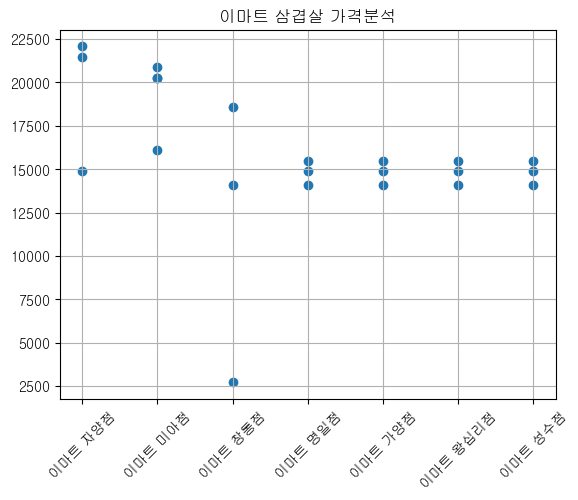

In [87]:
# 시각화
x = df_sam_mart["시장/마트 이름"]
y = df_sam_mart["가격(원)"]

plt.scatter(x,y)
plt.title(f"{mart} 삼겹살 가격분석")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


# 달걀 가격 분석

## 달걀 데이터

In [92]:
# 2021-06 데이터 이용 // 달걀 // 30개 단위 // 가격 0원 초과(입고 안 된경우 있음)
df_egg=df[(df["품목 이름"].str.contains("달걀"))
          &(df["년도-월"]=="2021-06")
          &(df["실판매규격"].str.contains("30개"))
          &(df["가격(원)"]>0)]
df_egg

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
43,1670908,82,롯데마트 강변점,320,달걀(30개),30개,10800,2021-06,1등급란.특란,2,대형마트,215000,광진구,2021-06-24
52,1667084,10,용문시장,320,달걀(30개),30개,10500,2021-06,건강영양란,1,전통시장,170000,용산구,2021-06-24
62,1671401,42,이마트 가양점,320,달걀(30개),30개(1800g),6900,2021-06,"국내산,특란",2,대형마트,500000,강서구,2021-06-24
75,1667237,82,롯데마트 강변점,320,달걀(30개),30개,10800,2021-06,1등급란.특란,2,대형마트,215000,광진구,2021-06-24
82,1674093,42,이마트 가양점,320,달걀(30개),30개(1800g),6900,2021-06,"국내산,특란",2,대형마트,500000,강서구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6670,1669415,227,NC백화점 신구로점,17,달걀,30개(1.8kg),8990,2021-06,"국내산,특란",2,대형마트,530000,구로구,2021-06-24
6716,1668990,10,용문시장,320,달걀(30개),30개,10500,2021-06,건강영양란,1,전통시장,170000,용산구,2021-06-24
6756,1672097,102,목3동시장,320,달걀(30개),30개,9800,2021-06,"국내산 ,특란",1,전통시장,470000,양천구,2021-06-24
6771,1674008,102,목3동시장,320,달걀(30개),30개,9500,2021-06,"국내산,특란",1,전통시장,470000,양천구,2021-06-24


In [94]:
# 달걀 30구 평균 가격
df_egg["가격(원)"].mean()

9442.334426229509

In [95]:
# 달걀 최고 가격
df_egg["가격(원)"].max()

75000

In [96]:
# 달걀 최저 가격
df_egg["가격(원)"].min()

5520

In [97]:
df_egg[df_egg["가격(원)"]>=20000]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
414,1669381,108,남구로시장,320,달걀(30개),30개(1.5kg),75000,2021-06,"국내산,특란",1,전통시장,530000,구로구,2021-06-24


## 우리동네 달걀 가격

In [99]:
gu = input("우리 동네:")
print(f"우리 동네는 : {gu}" )

우리 동네는 : 광진구


In [100]:
# 우리구 달걀 가격
df_egg_gu = df_egg[df_egg["자치구 이름"]==gu][[
    "시장/마트 이름","품목 이름","실판매규격","가격(원)"]].drop_duplicates()
df_egg_gu

,시장/마트 이름,품목 이름,실판매규격,가격(원)
43,롯데마트 강변점,달걀(30개),30개,10800
887,자양골목시장,달걀(30개),30개,9800
1419,이마트 자양점,달걀(30개),30개,6900
5879,노룬산골목시장,달걀(30개),30개,11000
5913,노룬산골목시장,달걀(30개),30개,9800


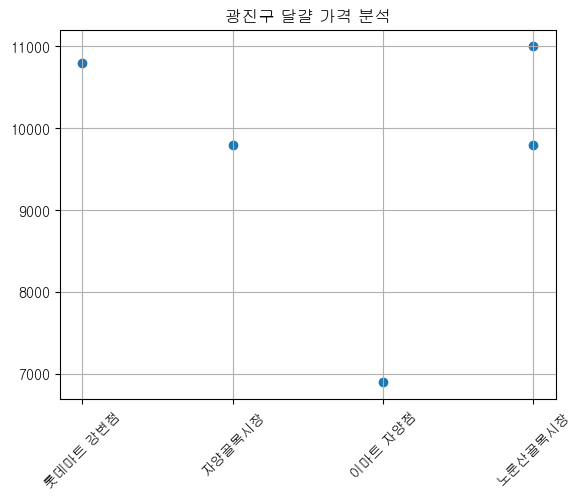

In [101]:
# 시각화
x = df_egg_gu["시장/마트 이름"]
y = df_egg_gu["가격(원)"]

plt.scatter(x,y)
plt.title(f"{gu} 달걀 가격 분석")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


## 마트 지점별 달걀 가격

In [110]:
mart = input("마트 이름:")
print(f"마트 이름는 : {mart}" )

마트 이름는 : 시장


In [111]:
# 마트 지점별 달걀 가격
df_egg_mart = df_egg[df_egg["시장/마트 이름"].str.contains(mart)][[
    "시장/마트 이름","품목 이름","실판매규격","가격(원)"]].drop_duplicates()
df_egg_mart

,시장/마트 이름,품목 이름,실판매규격,가격(원)
52,용문시장,달걀(30개),30개,10500
159,영등포전통시장,달걀(30개),30개,8200
184,신영시장,달걀(30개),30개,7000
199,망원시장,달걀(30개),30개,8500
302,남구로시장,달걀(30개),30개(1.5kg),8000
...,...,...,...,...
6394,도곡시장,달걀(30개),30개,10880
6584,대조시장,달걀(30개),30개(2.04kg),9000
6599,대조시장,달걀(30개),30개(1.8kg),8500
6756,목3동시장,달걀(30개),30개,9800


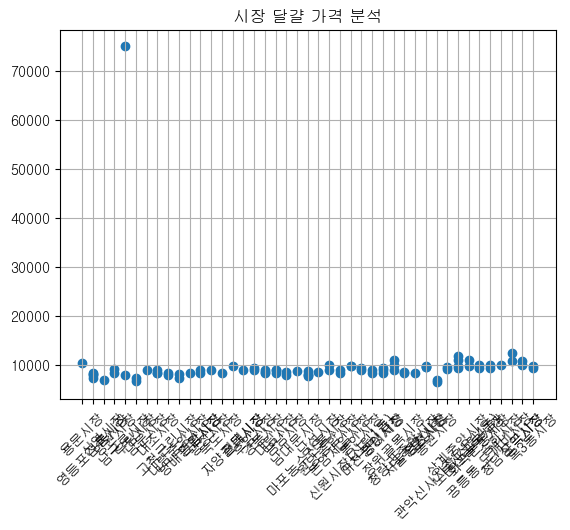

In [112]:
# 시각화
x = df_egg_mart["시장/마트 이름"]
y = df_egg_mart["가격(원)"]

plt.scatter(x,y)
plt.title(f"{mart} 달걀 가격 분석")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()